In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.drop(columns=["User ID","Gender"],inplace=True)

In [7]:
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [8]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

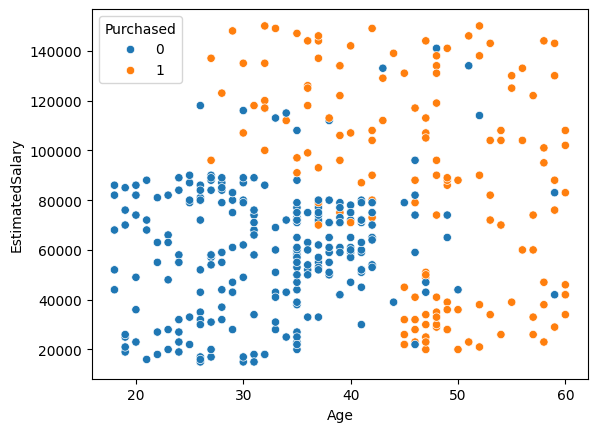

In [13]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")

In [9]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [14]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [36]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [18]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
kn.score(x_test,y_test)*100

92.5

In [31]:
kn.score(x_train,y_train)*100

90.625

In [35]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print(i,knn.score(x_train,y_train)*100,knn.score(x_test,y_test)*100)

1 99.6875 85.0
2 91.5625 86.25
3 92.5 91.25
4 91.875 92.5
5 90.9375 92.5
6 90.9375 90.0
7 91.875 93.75
8 90.625 92.5
9 91.25 93.75
10 90.625 92.5
11 90.9375 92.5
12 91.25 92.5
13 91.5625 92.5
14 90.625 92.5
15 90.625 92.5
16 90.0 92.5
17 90.625 92.5
18 90.0 92.5
19 90.9375 92.5
20 90.0 93.75
21 90.3125 92.5
22 90.0 93.75
23 90.3125 93.75
24 89.375 93.75
25 90.0 93.75
26 89.375 93.75
27 89.375 92.5
28 88.75 93.75
29 88.75 93.75


In [37]:
kn.predict([[-1.7817974284598157,-1.4900462352132775]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

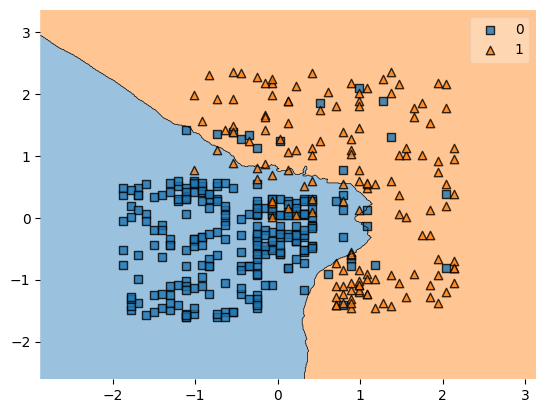

In [38]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)

knn using regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
kn2=KNeighborsRegressor(n_neighbors=10)
kn2.fit(x_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
kn2.score(x_test,y_test)*100

74.28571428571429

In [43]:
kn2.score(x_train,y_train)*100

70.00212089077412

In [44]:
kn2.predict([[-1.7817974284598157,-1.4900462352132775]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([0.])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


<Axes: >

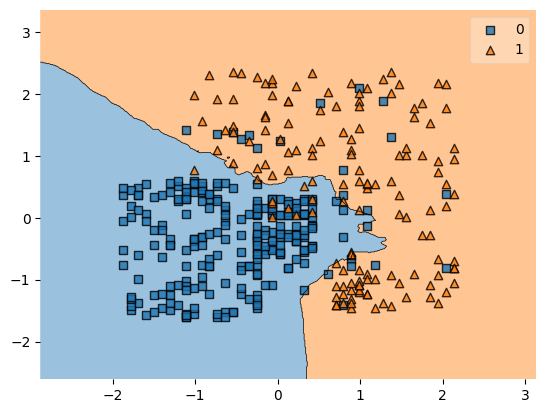

In [45]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=kn2)